In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#creating DataFrame with all clinical notes
import glob
import os

all_files = glob.glob(os.path.join("/home/ana.lopes/mscmulmiesclin_v0.1", "*.csv"))

df_notes = pd.concat((pd.read_csv(f, index_col = [0]) for f in all_files), ignore_index=True )

df_notes.head()

,Note ID,Clinical Text,tokens,upos,id,text,short_codes,predicted labels,code_probabilities
0,note_0,"Name: Wright, Summer Unit No: 11\n...","['name', ':', 'Wright', ',', 'summer', 'unit',...","['NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'NOUN', 'N...",NaN,NaN,NaN,NaN,NaN
1,note_1,"Name: Hancock, Danny Unit No: 13\n...","['name', ':', 'Hancock', ',', 'Danny', 'unit',...","['NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', '...",NaN,NaN,NaN,NaN,NaN
2,note_2,"Name: Banks, Jason Unit No: 11\n...","['name', ':', 'bank', ',', 'Jason', 'unit', 'n...","['NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'PROPN', 'N...",NaN,NaN,NaN,NaN,NaN
3,note_3,"Name: Brown, Robert Unit No: ...","['name', ':', 'Brown', ',', 'Robert', 'unit', ...","['NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', '...",NaN,NaN,NaN,NaN,NaN
4,note_4,"Name: Garrett,Pamela Unit No: ...","['name', ':', 'Garrett', ',', 'Pamela', 'unit'...","['NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', '...",NaN,NaN,NaN,NaN,NaN


In [8]:
print(type(df_notes['upos'][0]))
type(df_notes['tokens'][0])


<class 'str'>


str

In [9]:
#Convert str to list
import ast

df_notes['tokens'] = df_notes['tokens'].apply(lambda x: ast.literal_eval(x))
df_notes['upos'] = df_notes['upos'].apply(lambda x: ast.literal_eval(x))

print(type(df_notes['tokens'][0]))
print(type(df_notes['upos'][0]))

df_notes.head()

ValueError: malformed node or string: nan

In [ ]:
#Preprocessing : remove pontuation

import string

punc = list(string.punctuation)

df_notes['no_punc'] = df_notes['tokens'].apply(lambda x: [word for word in x if word not in punc])


df_notes.head()




,Note ID,Clinical Text,tokens,upos,no_punc
0,note_0,"Name: Wright, Summer Unit No: 11\n...","[name, :, Wright, ,, summer, unit, no, :, 11, ...","[NOUN, PUNCT, PROPN, PUNCT, NOUN, NOUN, DET, P...","[name, Wright, summer, unit, no, 11, admission..."
1,note_1,"Name: Hancock, Danny Unit No: 13\n...","[name, :, Hancock, ,, Danny, unit, no, :, 13, ...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Hancock, Danny, unit, no, 13, admission..."
2,note_2,"Name: Banks, Jason Unit No: 11\n...","[name, :, bank, ,, Jason, unit, no, :, 11, adm...","[NOUN, PUNCT, NOUN, PUNCT, PROPN, NOUN, DET, P...","[name, bank, Jason, unit, no, 11, admission, d..."
3,note_3,"Name: Brown, Robert Unit No: ...","[name, :, Brown, ,, Robert, unit, no, :, 10, a...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Brown, Robert, unit, no, 10, admission,..."
4,note_4,"Name: Garrett,Pamela Unit No: ...","[name, :, Garrett, ,, Pamela, unit, no, :, 11,...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Garrett, Pamela, unit, no, 11, admissio..."


In [ ]:
df_notes['upos'][0]

['NOUN',
 'PUNCT',
 'PROPN',
 'PUNCT',
 'NOUN',
 'NOUN',
 'DET',
 'PUNCT',
 'NUM',
 'NOUN',
 'NOUN',
 'PUNCT',
 'NUM',
 'NOUN',
 'NOUN',
 'PUNCT',
 'NUM',
 'NOUN',
 'ADP',
 'NOUN',
 'PUNCT',
 'NUM',
 'NUM',
 'SYM',
 'NUM',
 'NOUN',
 'PUNCT',
 'NOUN',
 'NOUN',
 'PUNCT',
 'PROPN',
 'ADJ',
 'ADJ',
 'PROPN',
 'NOUN',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'PUNCT',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'NUM',
 'SYM',
 'NUM',
 'SYM',
 'NUM',
 'PUNCT',
 'DET',
 'NOUN',
 'AUX',
 'VERB',
 'DET',
 'NOUN',
 'NOUN',
 'PUNCT',
 'ADP',
 'DET',
 'NOUN',
 'PUNCT',
 'PRON',
 'VERB',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'CCONJ',
 'VERB',
 'PRON',
 'NOUN',
 'NOUN',
 'ADP',
 'NUM',
 'NOUN',
 'ADP',
 'NUM',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'PUNCT',
 'ADP',
 'DET',
 'NOUN',
 'PRON',
 'ADV',
 'VERB',
 'DET',
 'VERB',
 'NOUN',
 'NOUN',
 'PUNCT',
 'NOUN',
 'ADP',
 'NUM',
 'CCONJ',
 'NOUN',
 'PUNCT',
 'NOUN',
 'NOUN',
 'AUX',
 'VERB',
 'CCONJ',
 'NOUN',
 'NOUN',
 'NOUN',
 'AUX',
 'VERB',
 'PUNCT',
 'NOUN',
 'NOUN',
 '

In [ ]:
#Preprocessing : removing stopwords

import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df_notes['stopwords_removed'] = df_notes['no_punc'].apply(lambda x: [word for word in list(x) if word not in stop_words])
df_notes.head()

,Note ID,Clinical Text,tokens,upos,no_punc,stopwords_removed
0,note_0,"Name: Wright, Summer Unit No: 11\n...","[name, :, Wright, ,, summer, unit, no, :, 11, ...","[NOUN, PUNCT, PROPN, PUNCT, NOUN, NOUN, DET, P...","[name, Wright, summer, unit, no, 11, admission...","[name, Wright, summer, unit, 11, admission, da..."
1,note_1,"Name: Hancock, Danny Unit No: 13\n...","[name, :, Hancock, ,, Danny, unit, no, :, 13, ...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Hancock, Danny, unit, no, 13, admission...","[name, Hancock, Danny, unit, 13, admission, da..."
2,note_2,"Name: Banks, Jason Unit No: 11\n...","[name, :, bank, ,, Jason, unit, no, :, 11, adm...","[NOUN, PUNCT, NOUN, PUNCT, PROPN, NOUN, DET, P...","[name, bank, Jason, unit, no, 11, admission, d...","[name, bank, Jason, unit, 11, admission, date,..."
3,note_3,"Name: Brown, Robert Unit No: ...","[name, :, Brown, ,, Robert, unit, no, :, 10, a...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Brown, Robert, unit, no, 10, admission,...","[name, Brown, Robert, unit, 10, admission, dat..."
4,note_4,"Name: Garrett,Pamela Unit No: ...","[name, :, Garrett, ,, Pamela, unit, no, :, 11,...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Garrett, Pamela, unit, no, 11, admissio...","[name, Garrett, Pamela, unit, 11, admission, d..."


In [ ]:
#Preprocessing : removing numbers

def remove_numbers(list):
    for word in list:
        try:
            int(str(word))
            list.remove(word)
        except ValueError:
            continue
    return list

df_notes['numbers_removed'] = df_notes['stopwords_removed'].apply(lambda x: remove_numbers(x))
df_notes.head()

,Note ID,Clinical Text,tokens,upos,no_punc,stopwords_removed,numbers_removed
0,note_0,"Name: Wright, Summer Unit No: 11\n...","[name, :, Wright, ,, summer, unit, no, :, 11, ...","[NOUN, PUNCT, PROPN, PUNCT, NOUN, NOUN, DET, P...","[name, Wright, summer, unit, no, 11, admission...","[name, Wright, summer, unit, admission, date, ...","[name, Wright, summer, unit, admission, date, ..."
1,note_1,"Name: Hancock, Danny Unit No: 13\n...","[name, :, Hancock, ,, Danny, unit, no, :, 13, ...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Hancock, Danny, unit, no, 13, admission...","[name, Hancock, Danny, unit, admission, date, ...","[name, Hancock, Danny, unit, admission, date, ..."
2,note_2,"Name: Banks, Jason Unit No: 11\n...","[name, :, bank, ,, Jason, unit, no, :, 11, adm...","[NOUN, PUNCT, NOUN, PUNCT, PROPN, NOUN, DET, P...","[name, bank, Jason, unit, no, 11, admission, d...","[name, bank, Jason, unit, admission, date, 214...","[name, bank, Jason, unit, admission, date, 214..."
3,note_3,"Name: Brown, Robert Unit No: ...","[name, :, Brown, ,, Robert, unit, no, :, 10, a...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Brown, Robert, unit, no, 10, admission,...","[name, Brown, Robert, unit, admission, date, -...","[name, Brown, Robert, unit, admission, date, -..."
4,note_4,"Name: Garrett,Pamela Unit No: ...","[name, :, Garrett, ,, Pamela, unit, no, :, 11,...","[NOUN, PUNCT, PROPN, PUNCT, PROPN, NOUN, DET, ...","[name, Garrett, Pamela, unit, no, 11, admissio...","[name, Garrett, Pamela, unit, admission, date,...","[name, Garrett, Pamela, unit, admission, date,..."


In [ ]:
#Join all words in a single list

words = df_notes['numbers_removed']
allwords = []
for wordlist in words:
    allwords += wordlist
    

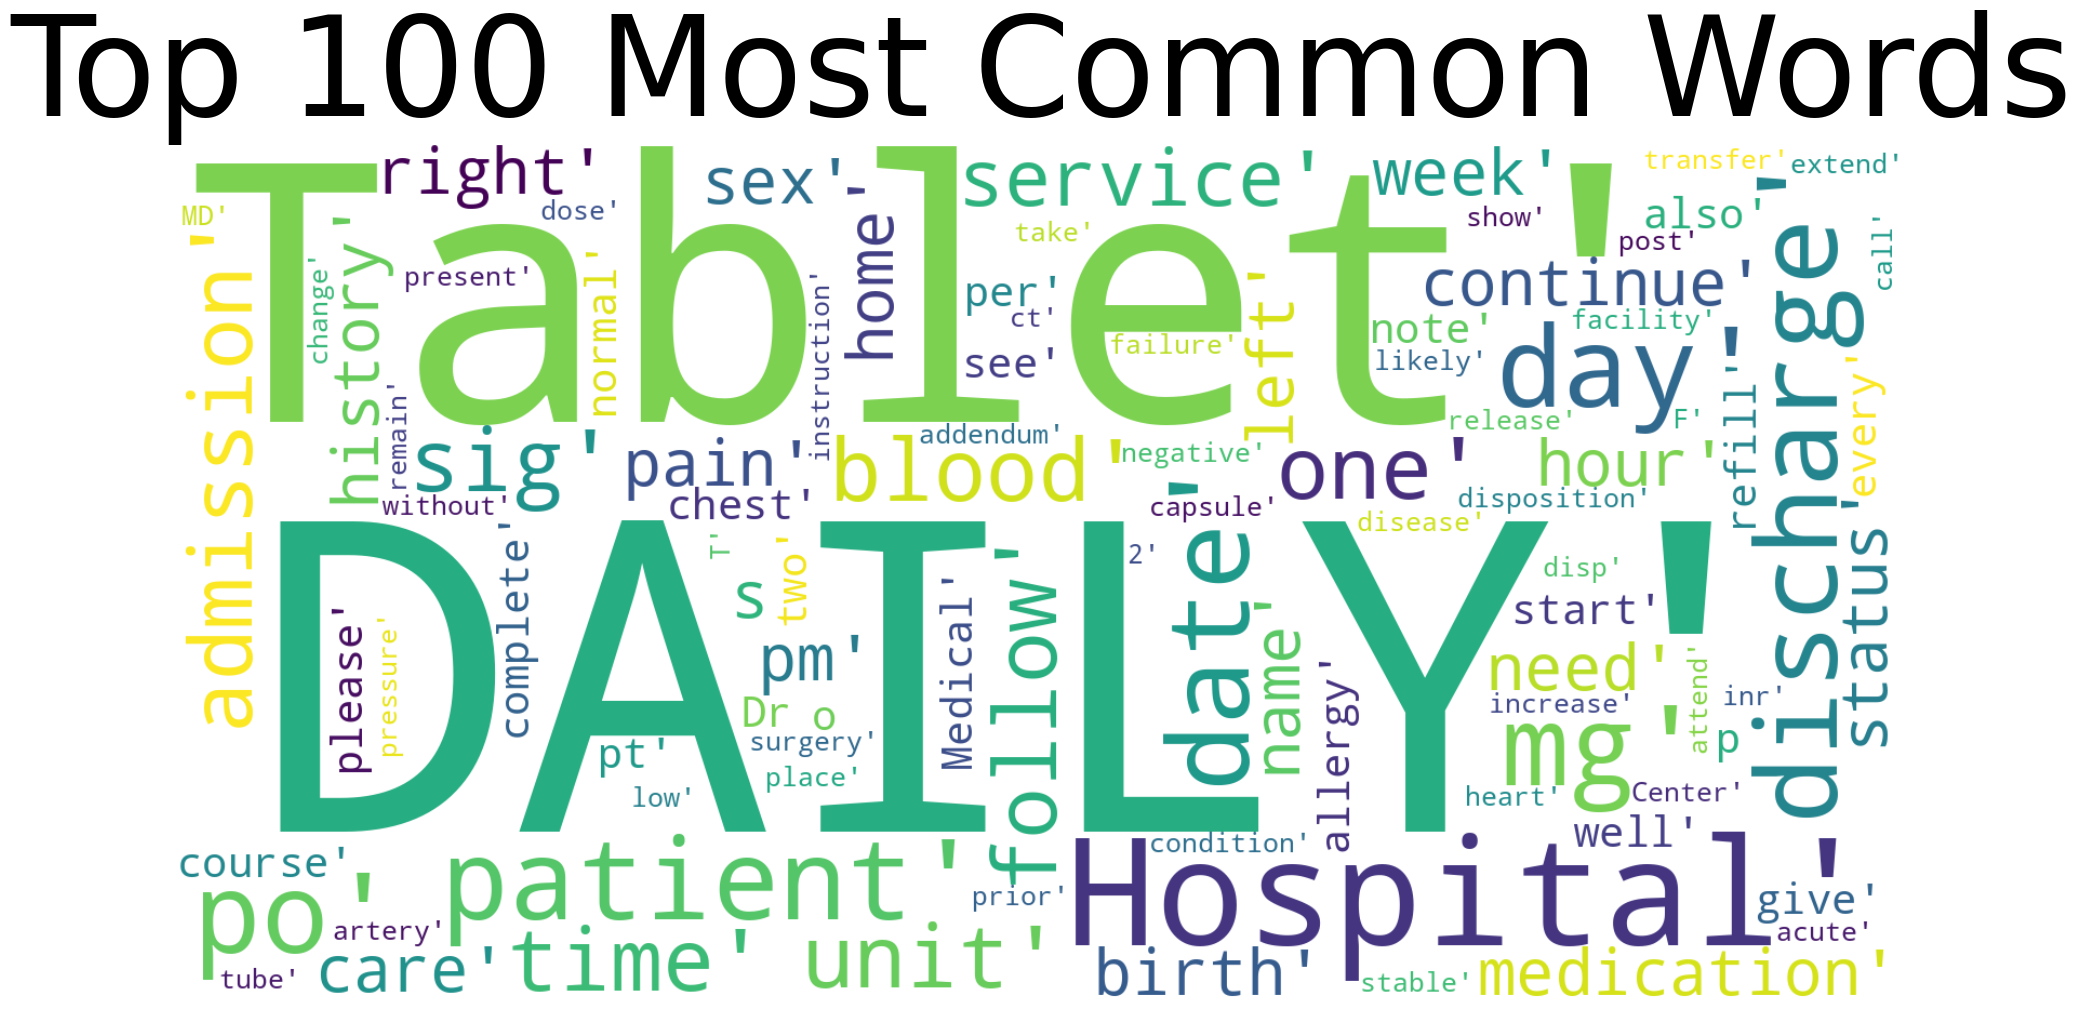

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.probability import FreqDist


mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

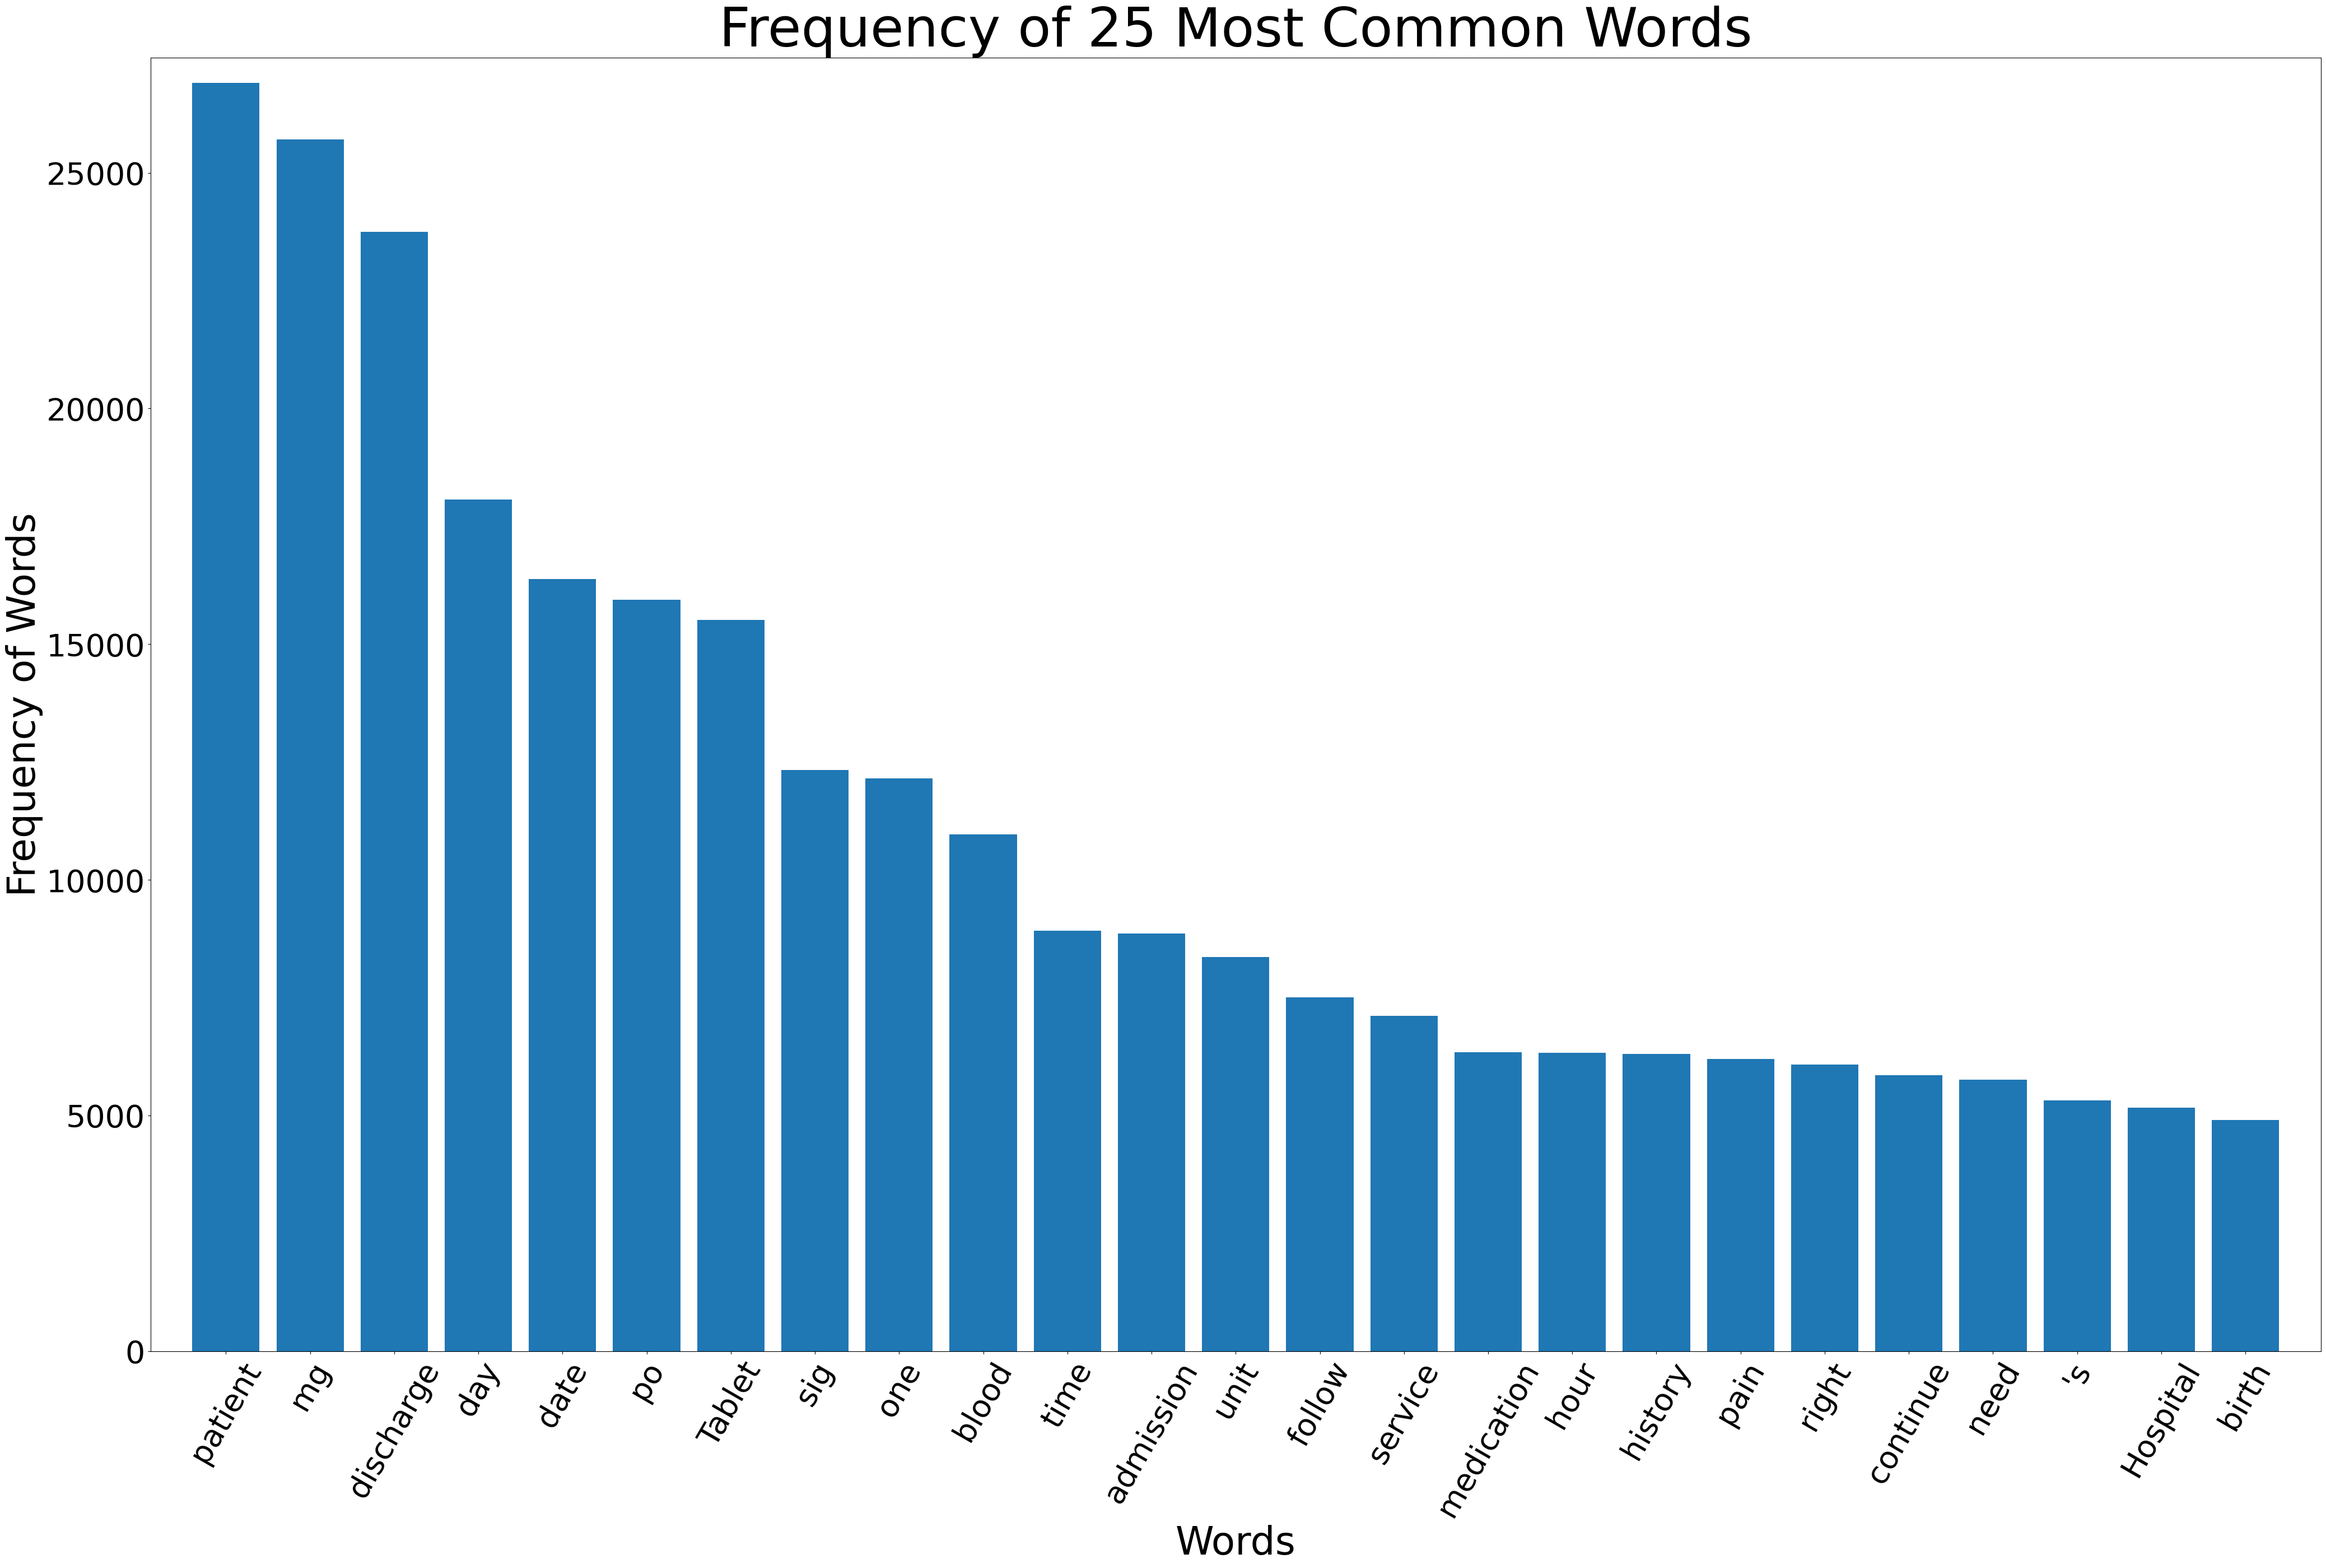

In [ ]:
from collections import Counter

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=70)
plt.show()

In [ ]:
lemmas = df_notes['tokens']
all_lemmas= []
for lemmalist in lemmas:
    all_lemmas += lemmalist

upos = df_notes['upos'] 
all_upos = []
for uposlist in upos:
    all_upos += uposlist


    

pandas.core.series.Series

In [ ]:
# List of  ADJ

indexes1 = [] 
for i in range(len(all_upos)):
    if all_upos[i] == "ADJ":
        indexes1.append(i)

adj = [all_lemmas[x] for x in indexes1]

adj


['Regional',
 'Medical',
 'severe',
 'nasal',
 'mild',
 'congestive',
 'questionable',
 'right',
 'low',
 'unchanged',
 'Medical',
 'intensive',
 'high',
 'Medical',
 'intensive',
 'noninvasive',
 'broad',
 'stable',
 'able',
 'afebrile',
 'medical',
 'transthoracic',
 'negative',
 'valvular',
 'short',
 'intensive',
 'several',
 'multiple',
 'possible',
 'intraabdominal',
 'secondary',
 'infectious',
 'peritoneal',
 'significant',
 'organismal',
 'white',
 'viral',
 'afebrile',
 'diabetic',
 'Diabetic',
 'renal',
 'peritoneal',
 'multiple',
 'different',
 'renal',
 'Coronary',
 'congestive',
 'active',
 'coronary',
 'intensive',
 'outpatient',
 'comfortable',
 'short',
 'congestive',
 'peritoneal',
 'correct',
 'outpatient',
 'outpatient',
 'diabetic',
 'separate',
 'Regional',
 'Medical',
 'severe',
 'nasal',
 'mild',
 'congestive',
 'questionable',
 'right',
 'low',
 'unchanged',
 'Medical',
 'intensive',
 'high',
 'Medical',
 'intensive',
 'noninvasive',
 'broad',
 'stable',
 'able

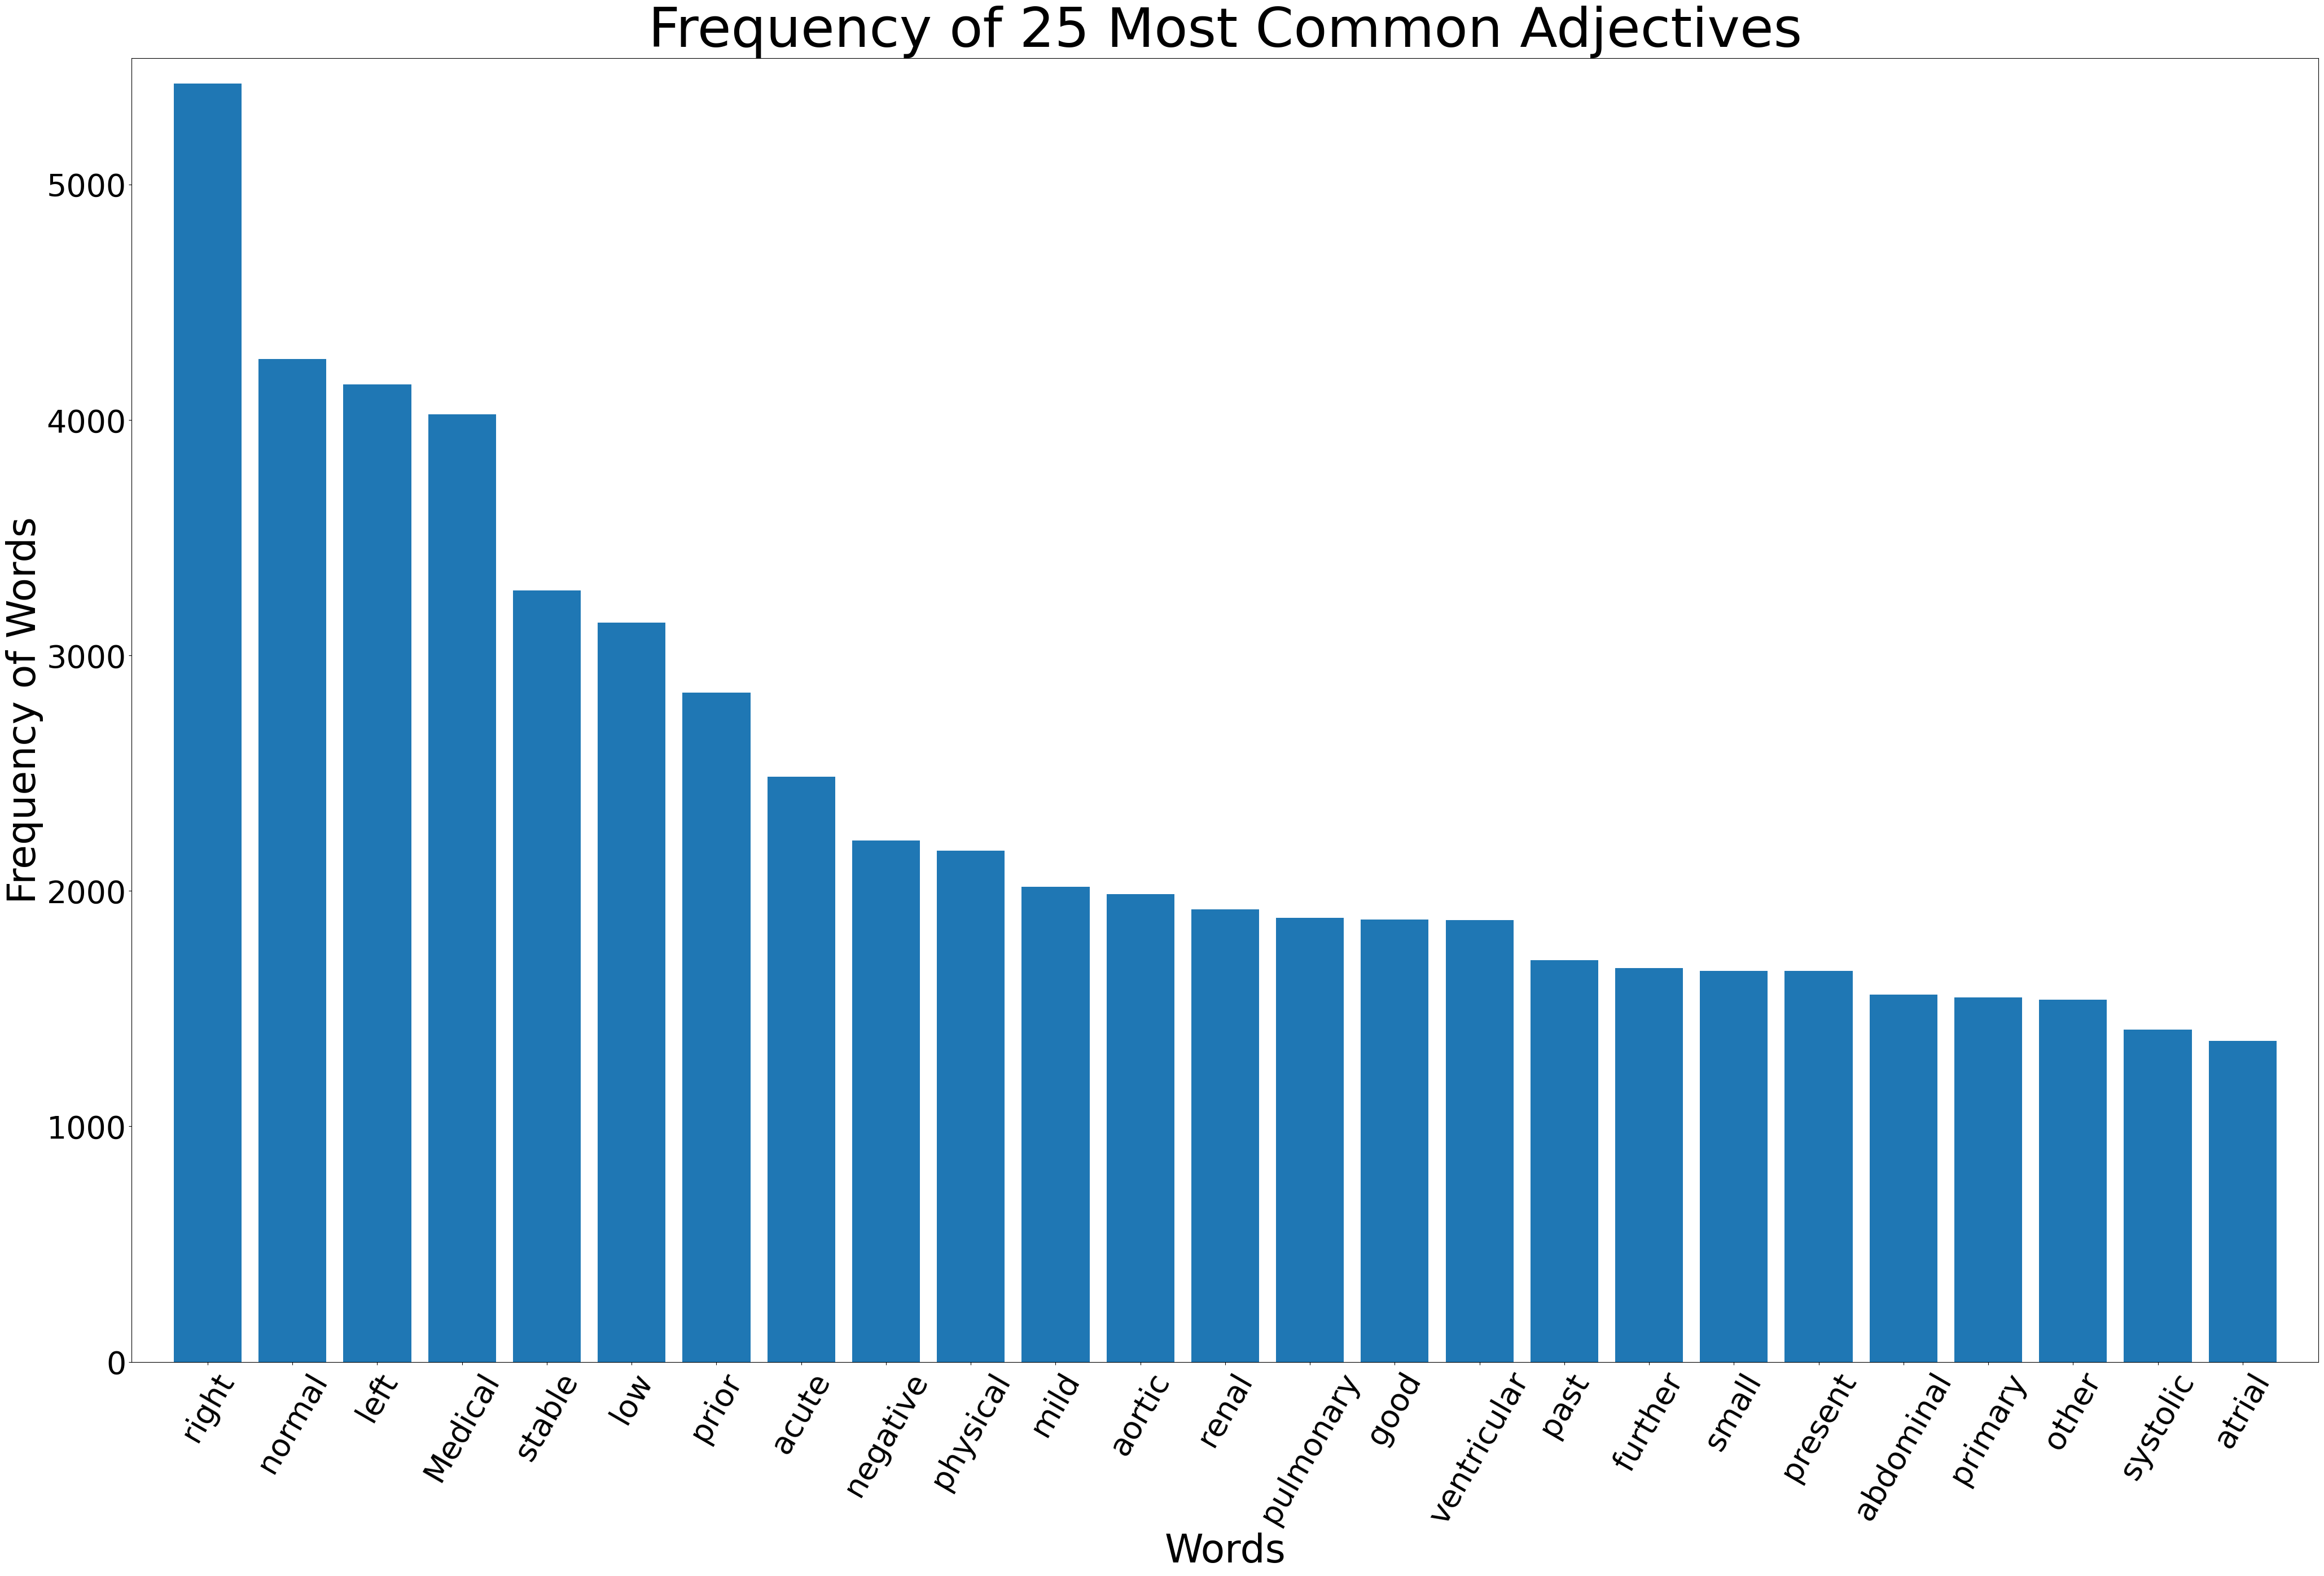

In [ ]:
mostcommon_small = FreqDist(adj).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Adjectives', fontsize=70)
plt.show()

In [ ]:
#List of NOUN

indexes2 = [] 
for i in range(len(all_upos)):
    if all_upos[i] == "NOUN":
        indexes2.append(i)

noun = [all_lemmas[x] for x in indexes2]

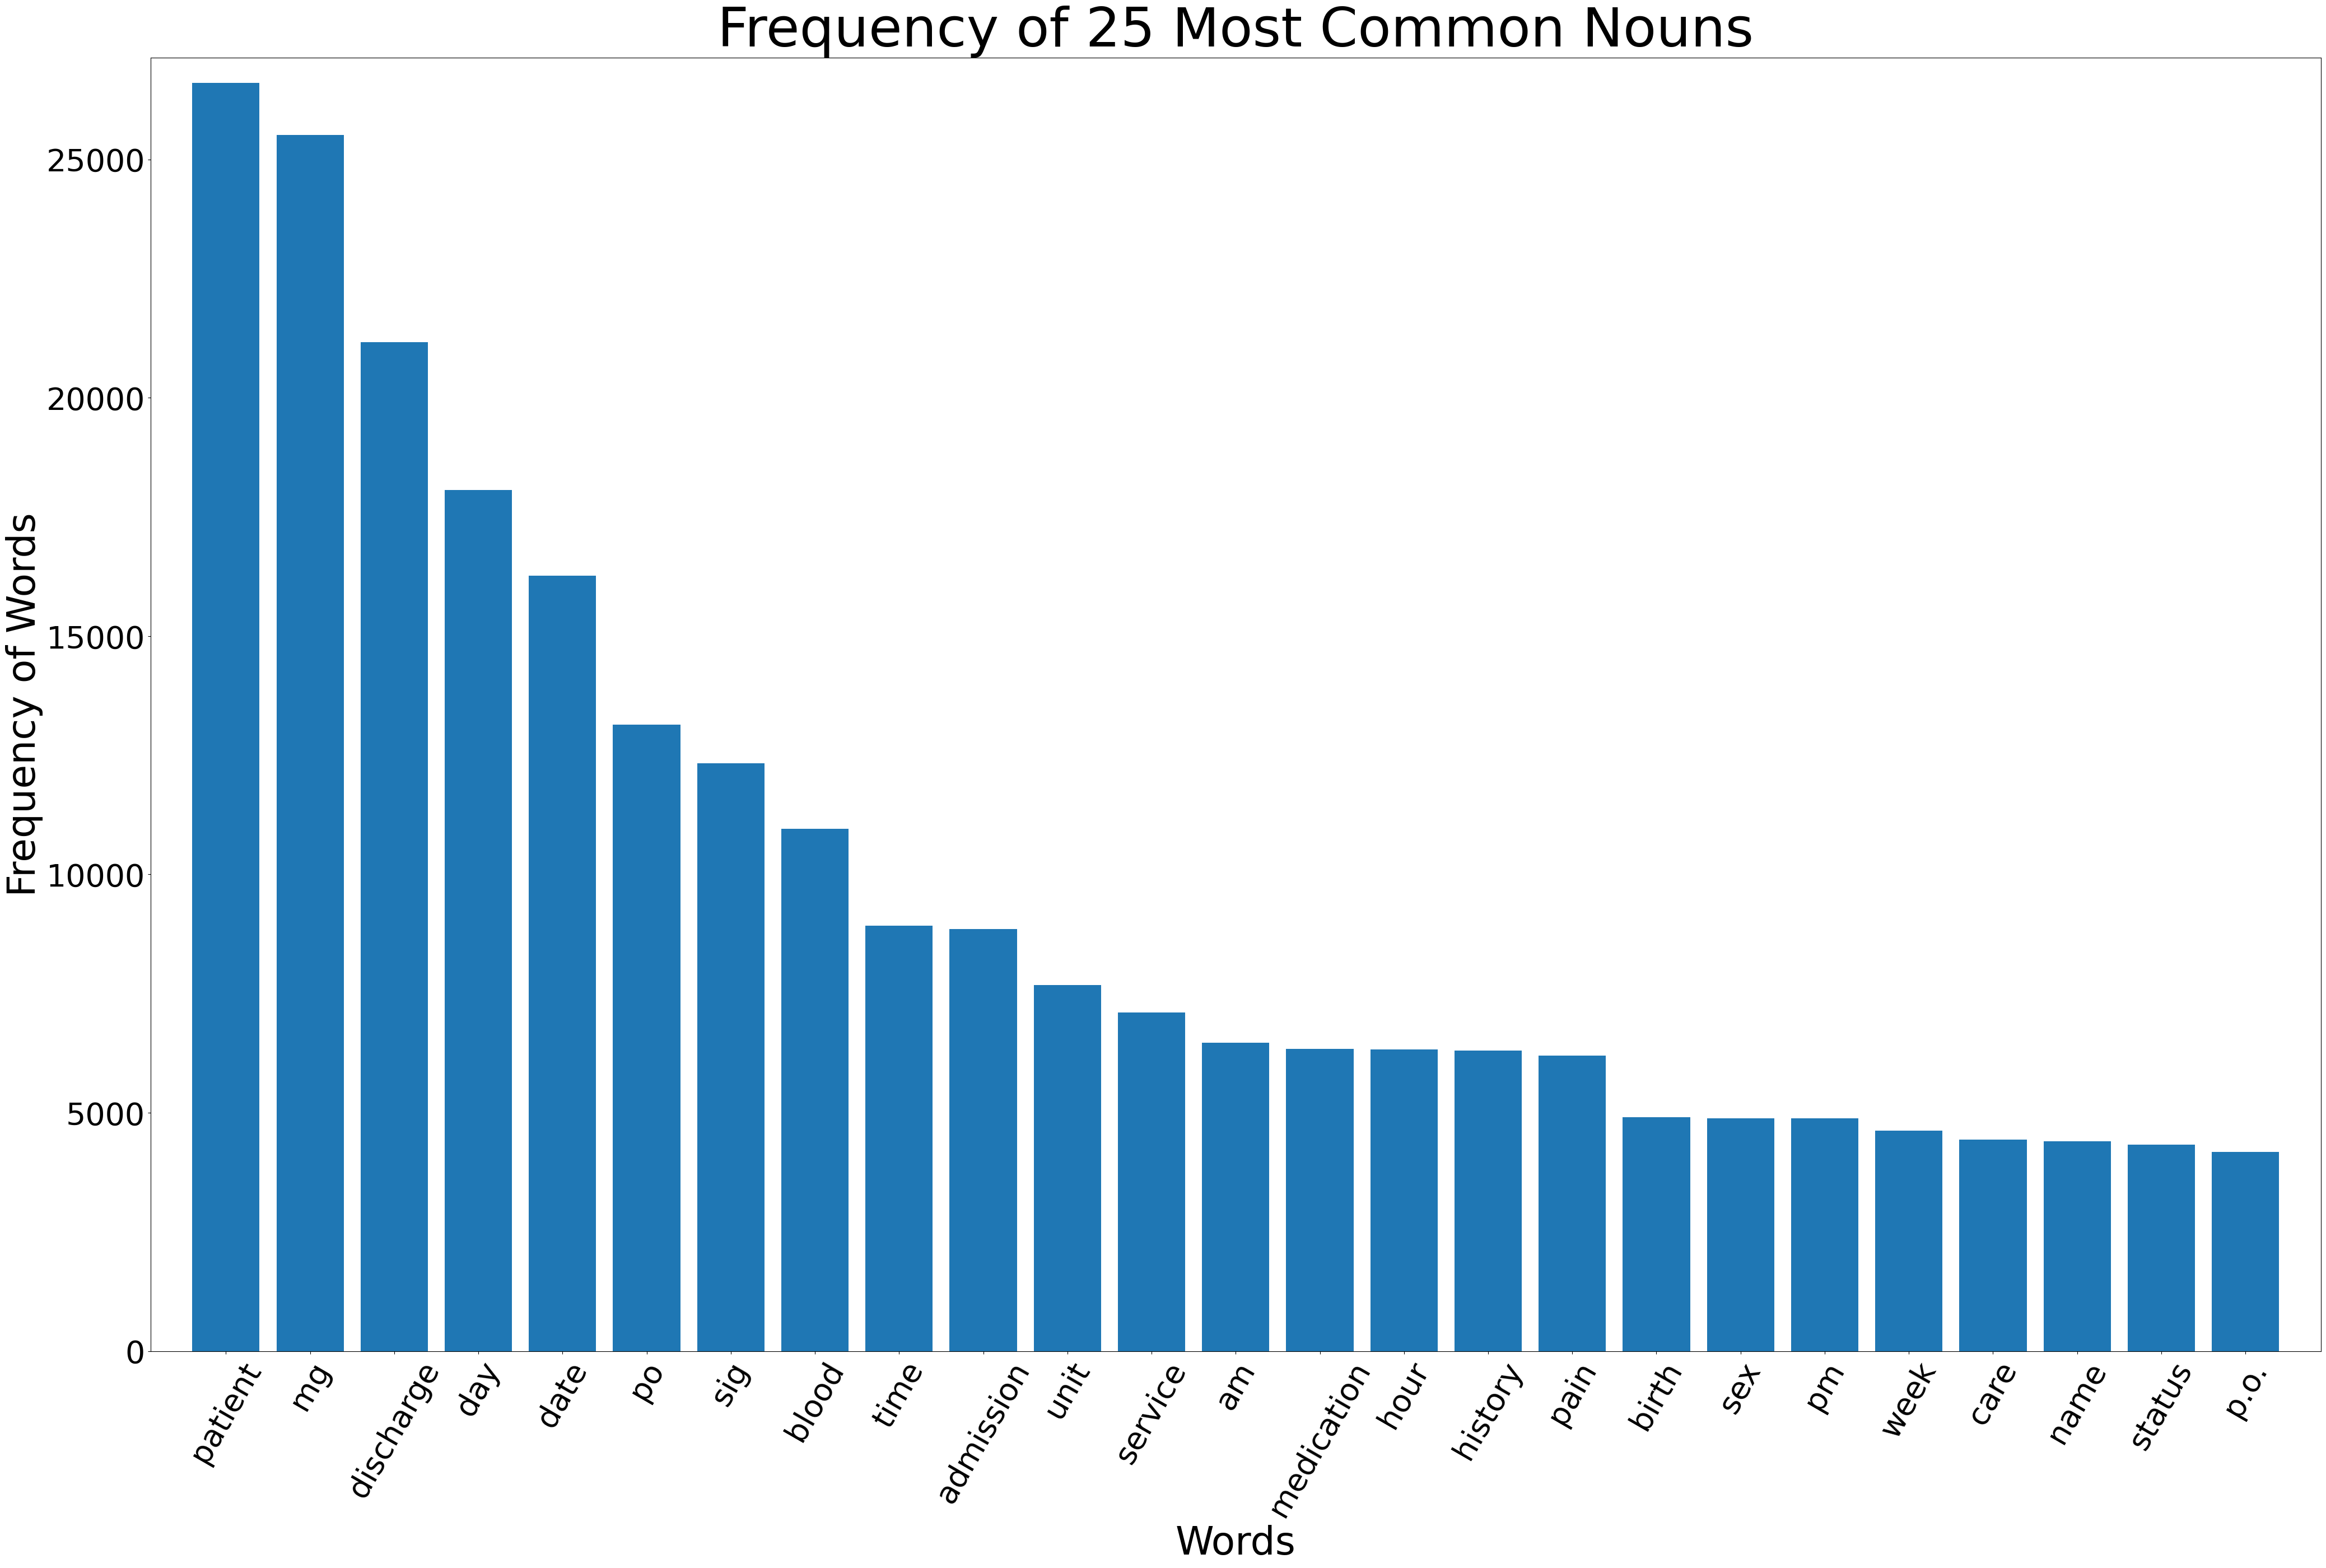

In [ ]:
mostcommon_small = FreqDist(noun).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Nouns', fontsize=70)
plt.show()

In [ ]:
#List of VERBS

indexes3 = [] 
for i in range(len(all_upos)):
    if all_upos[i] == "VERB":
        indexes3.append(i)

verb = [all_lemmas[x] for x in indexes3]

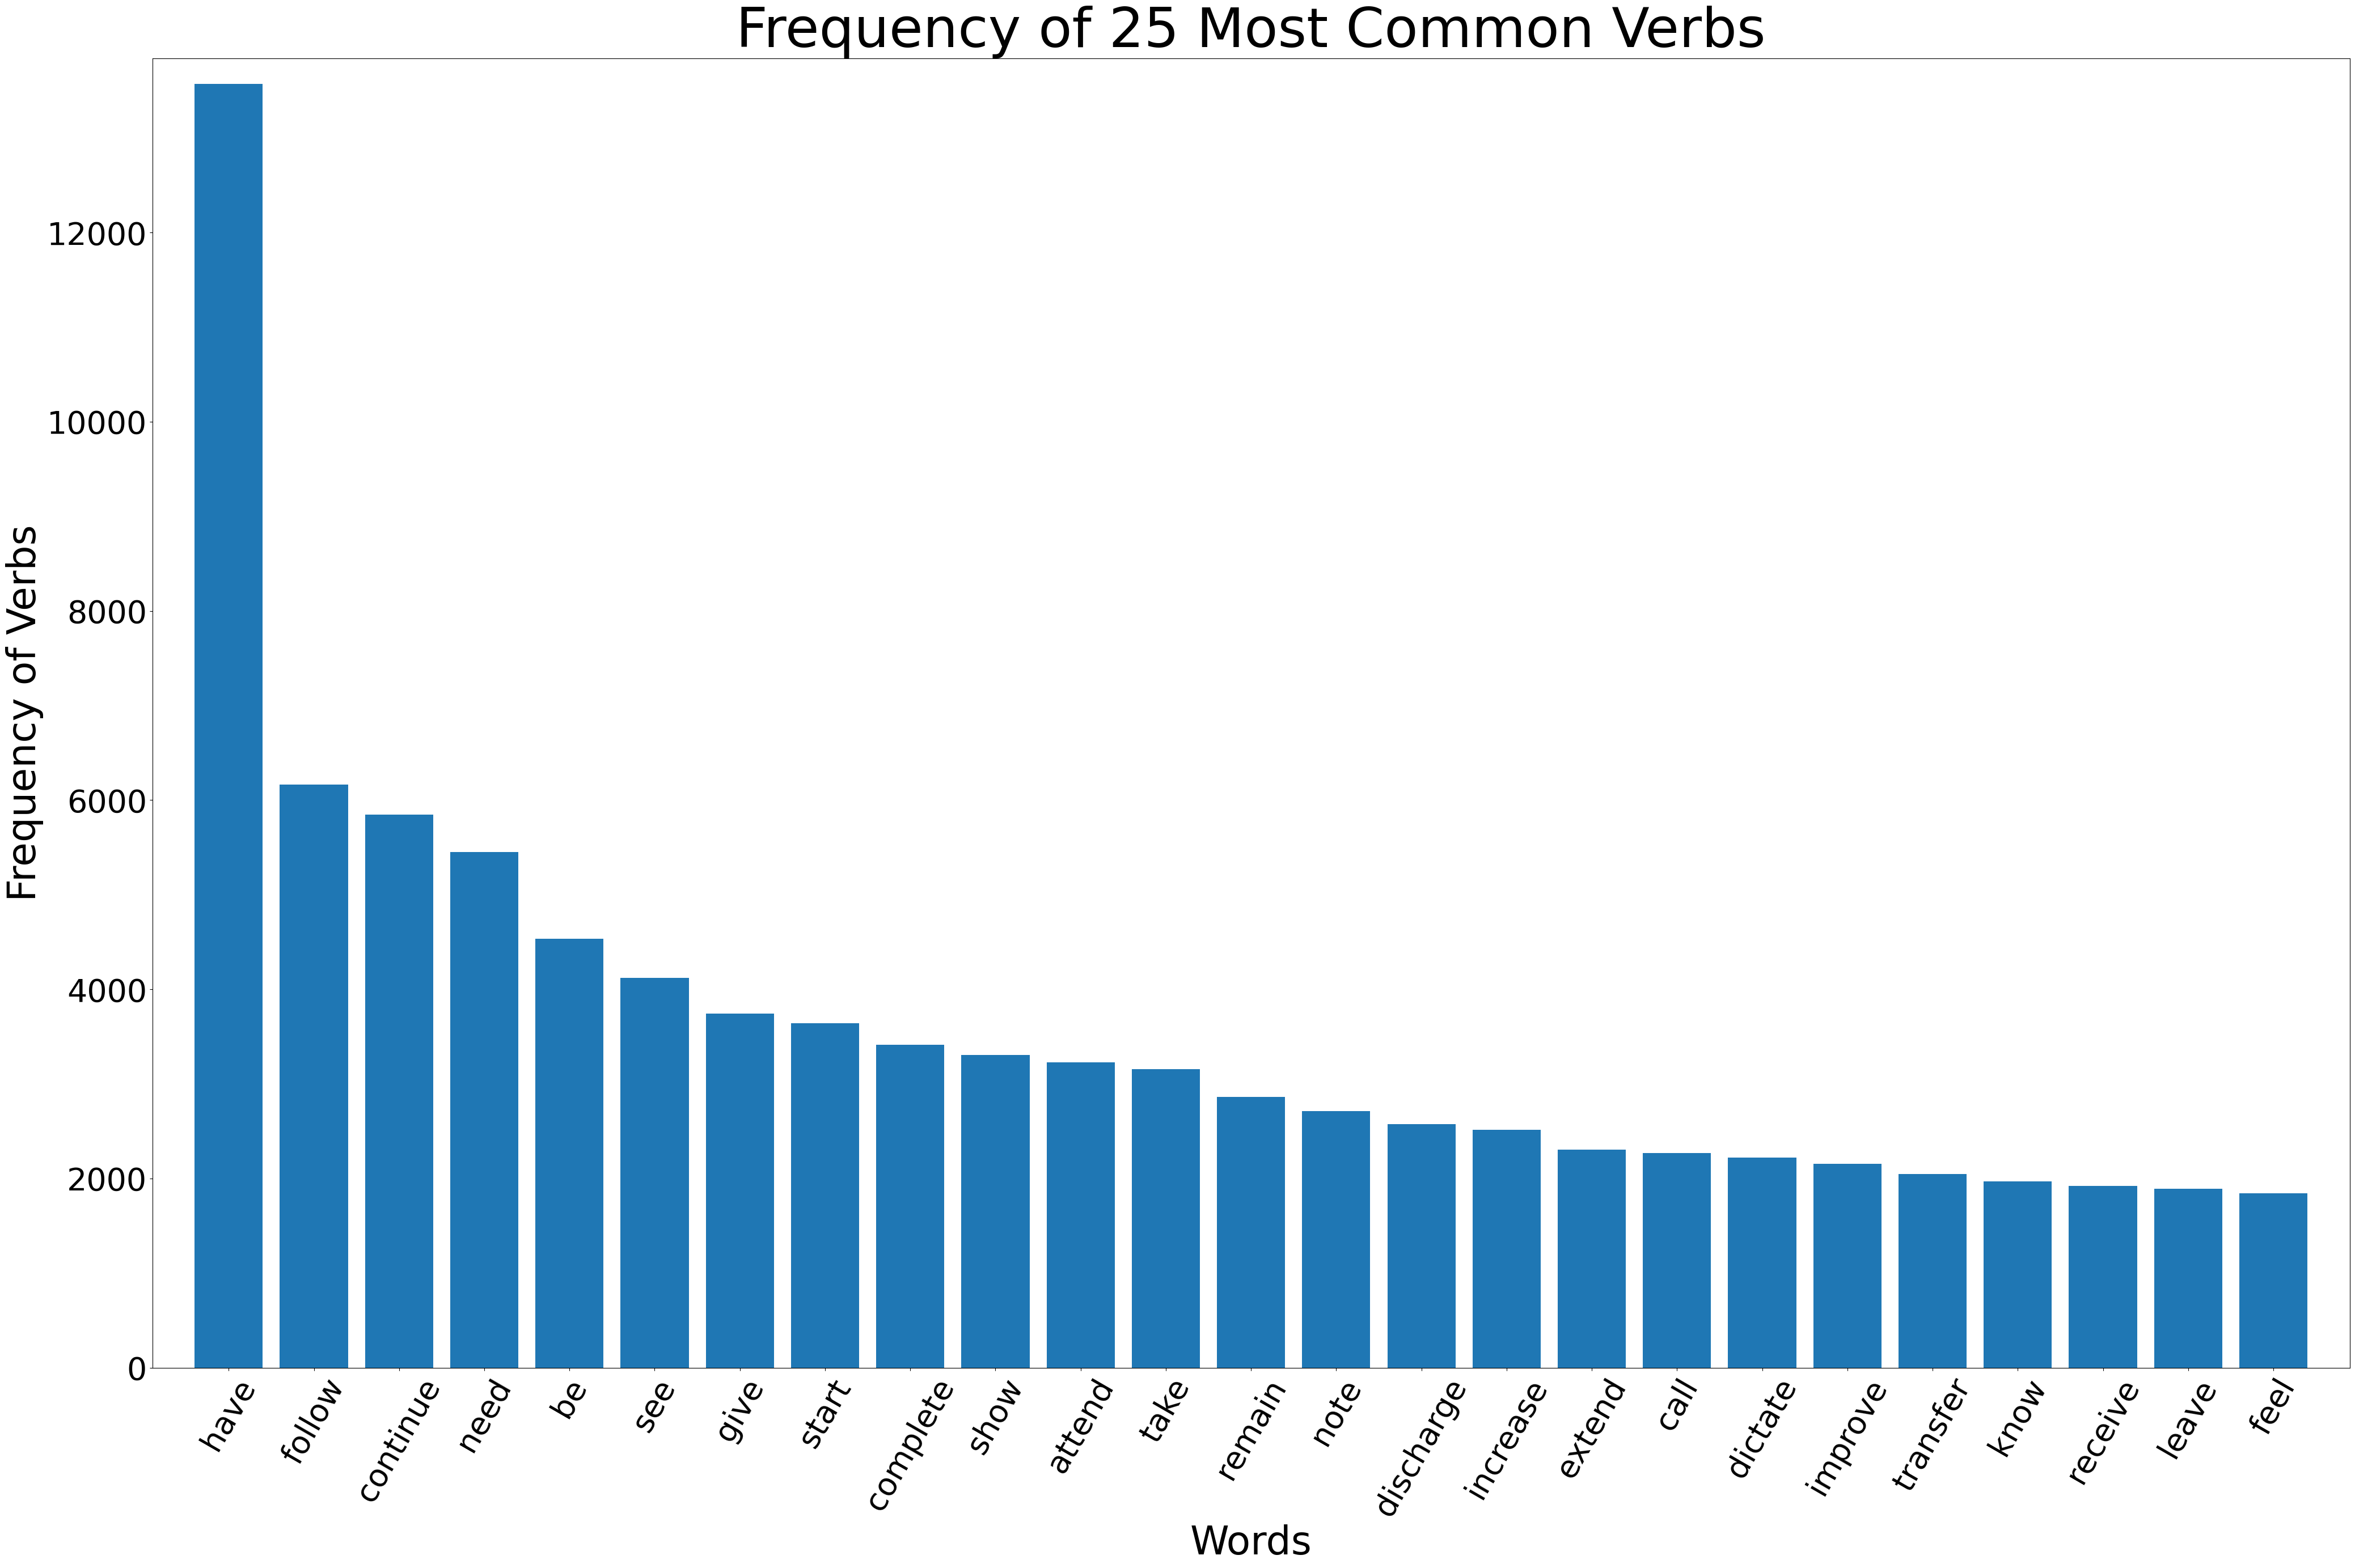

In [ ]:
mostcommon_small = FreqDist(verb).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Verbs', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Verbs', fontsize=70)
plt.show()

In [ ]:
#Average number of words per clinical note

df_notes['number of words'] = df_notes['numbers_removed'].apply(lambda x : len(x))
df_notes['number of words']

print("Average number of words per clinical note:", int(df_notes['number of words'].mean()))


Average number of words per clinical note: 365


<Axes: xlabel='number of words', ylabel='Count'>

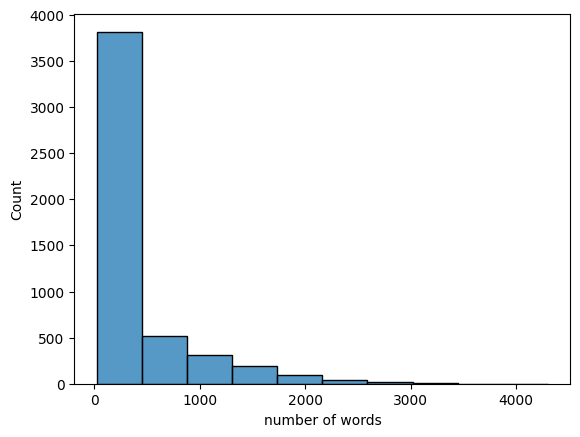

In [ ]:
sns.histplot(data=df_notes, x="number of words", bins=10)

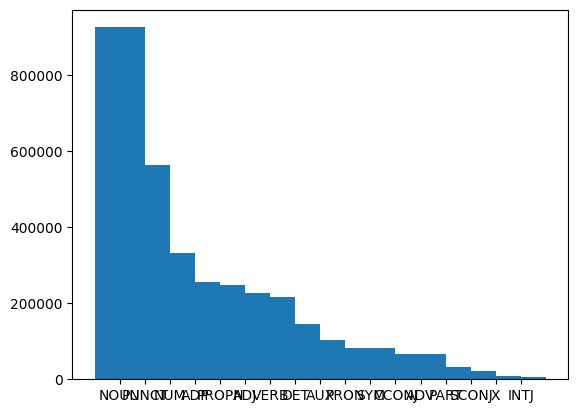

In [ ]:

counts = Counter(all_upos)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))



plt.bar(indexes, values,width)

# add labels
plt.xticks(indexes , labels, )
plt.show()


In [12]:
def remove_probabilities(indexes, prob_vec):
    new_prob_vec = []
    for i in range(len(prob_vec)):
        if i in indexes:
            new_prob_vec.append(prob_vec[i])
    return new_prob_vec

indexes = [2,5,6,9,16,45,56,78,79,80]
a = [i for i in range(100)]
remove_probabilities(indexes, a)


[2, 5, 6, 9, 16, 45, 56, 78, 79, 80]